**Importing all the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data:**

In [2]:
data = pd.read_csv("AirPassengers.csv")

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


**Converting the date to datetime object:**

In [4]:
data["Month"] = pd.to_datetime(data["Month"])

In [5]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


**changing the column to index:**

In [6]:
data = data.set_index(["Month"])

In [7]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
data.shape

(144, 1)

**Plotting the time series:**

<Axes: xlabel='Month'>

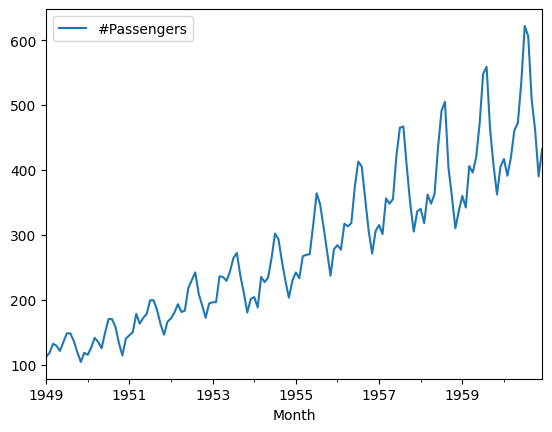

In [9]:
data.plot()

**lets check if the data is stationary data or not**

In [11]:
# to find the stationarity in data, we will use a statistical test i.e. adfuller test
# Augmented Dickey Fuller test

In [12]:
# here we will take two hypothesis

# 1) null hypothesis
# 2) Alternate Hypothesis

In [13]:
# h0- data is not stationary
# h1 - data is stationary

In [14]:
# To reject the null hypotheses, the following
# must be true:

# 1. If the p-value after the adfuller test is
# greater than 0.05, we fail to reject the
# hypotheses.

# 2. If the p-value is less than 0.05, we can
# reject the null hypotheses and assume
# that the time series is stationary.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(data["#Passengers"])
print(result)
#Test statstics
#P-value
#Lags used
#No of observations
#Critical values

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [19]:
result[0]

0.8153688792060498

In [20]:
if(result[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


**Seasonal decompose: It plots the components of the time series data.**


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

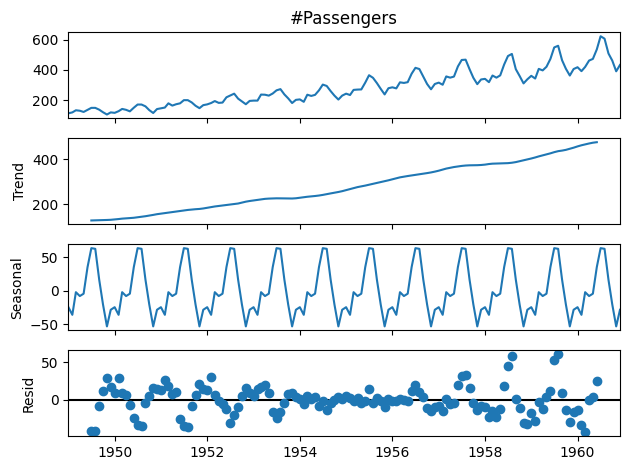

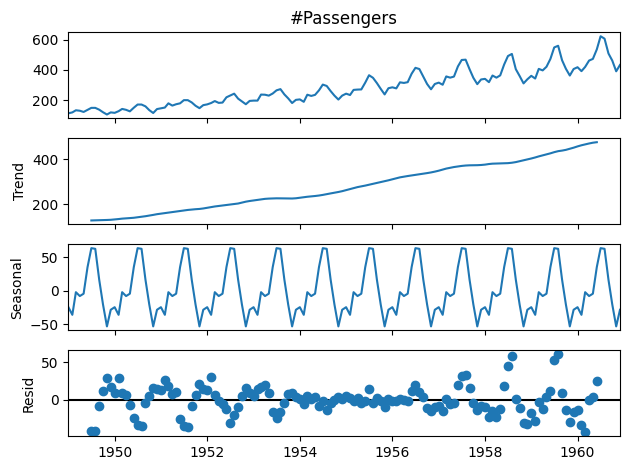

In [23]:
decomposition = seasonal_decompose(data["#Passengers"])
decomposition.plot()

**ROLLING STATISTICS:**


Rolling statistics is a very useful operation for time series data. Rolling mean creats a rolling window with a specified size and perform calculation on the data in this window which ofcourse rolls through the data.

Rolling stats also helps us to plot the mean and the standard deviation

In [24]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

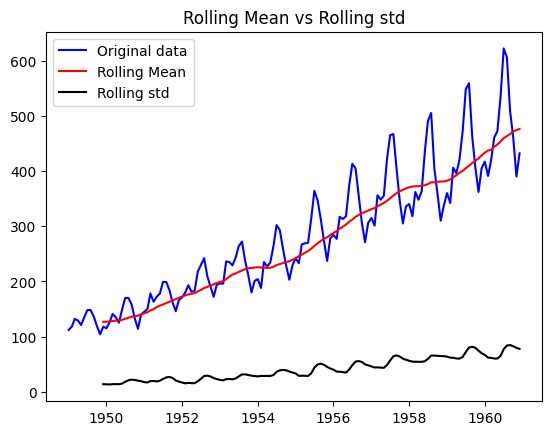

In [25]:
plt.plot(data,color="blue",label="Original data")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean vs Rolling std")
plt.show()

In [26]:
# transformation

first_log = np.log(data)

In [27]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [28]:
first_log = first_log.dropna()

In [29]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

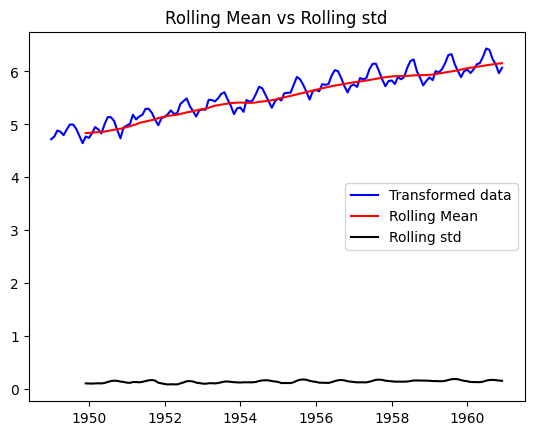

In [30]:
plt.plot(first_log,color="blue",label="Transformed data")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean vs Rolling std")
plt.show()

In [31]:
new_data = first_log - mean_log
new_data = new_data.dropna()

In [34]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

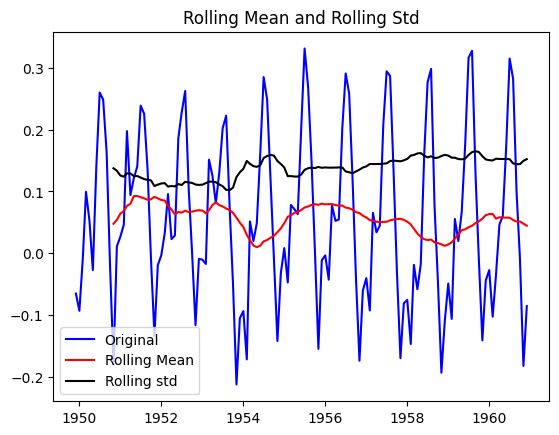

In [35]:
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [36]:
result = adfuller(new_data)
result

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

series is stationary


In [37]:
result

(-3.1629079913008833,
 0.022234630001242206,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

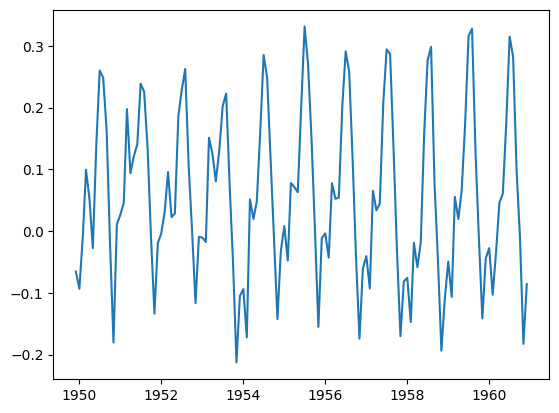

In [39]:
plt.plot(new_data)
plt.show()

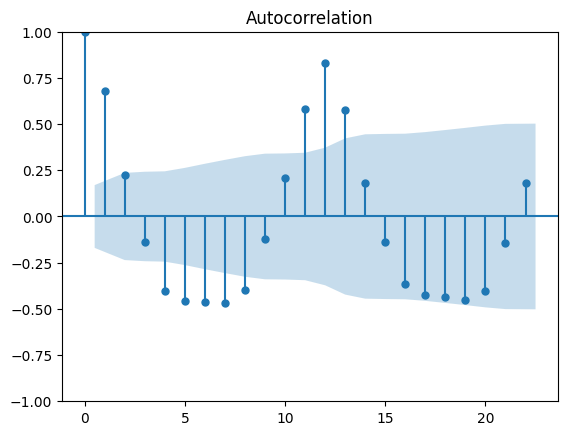

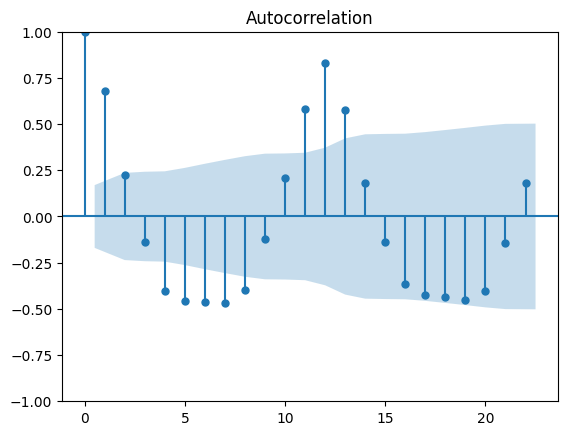

In [40]:
# Autocorrelation

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(new_data.dropna()) #=--------> value of q

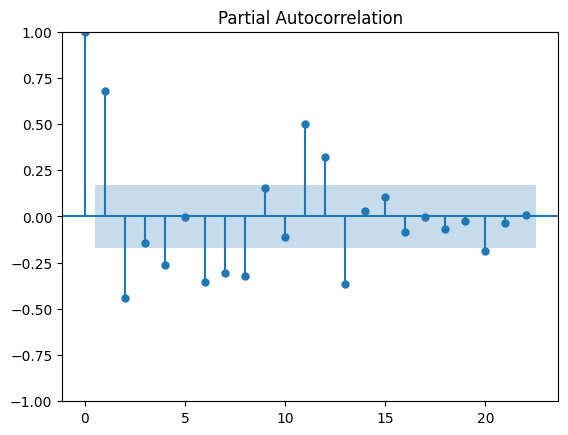

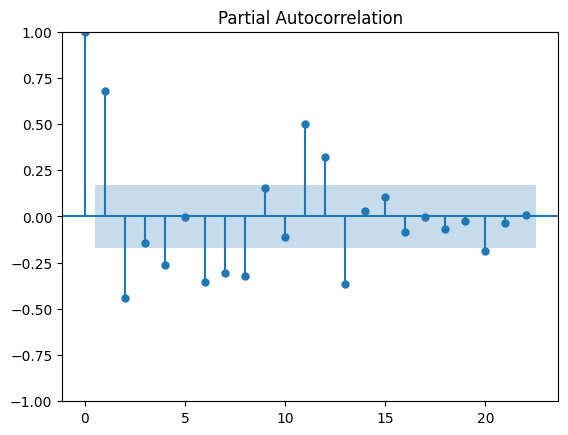

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_data.dropna())  #---------> value of p

In [42]:
train = new_data.iloc[:120]   #training data
test = new_data[121:]   #tetsing data

In [43]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [44]:
test

,#Passengers
Month,
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363
1960-09-01,0.098235


In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model = ARIMA(train,order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

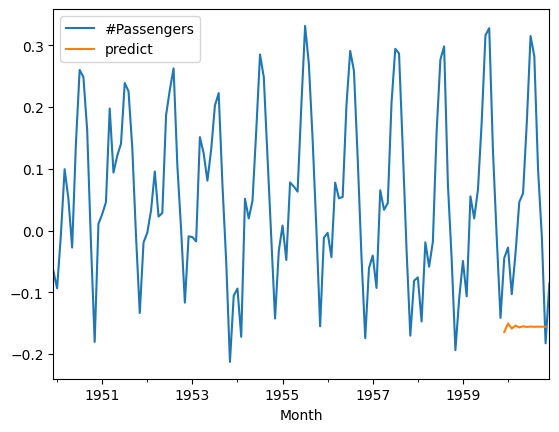

In [47]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [48]:
model = ARIMA(train,order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

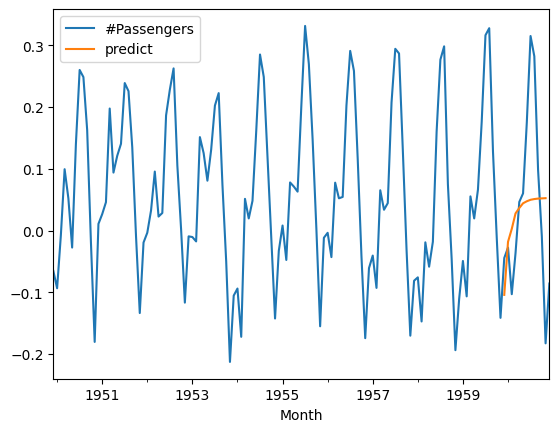

In [49]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [52]:
model1 = ARIMA(train,order=(2,1,1))
model_fit1 = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

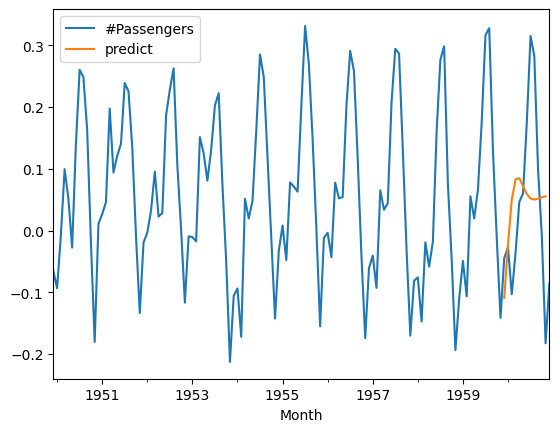

In [53]:
new_data['predict']=model_fit1.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

SARIMA MODEL:

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

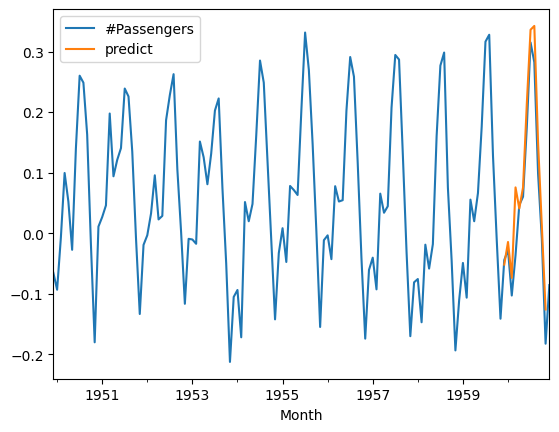

In [56]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

 Here, we can see the predicted values
on the test set are more accurate than
the ARIMA model. Therefore we have
successfully created a Time series
forecast model. Now we will use this
model to forecast the time series.

In [57]:
model1 = SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,2,12))
model1 = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

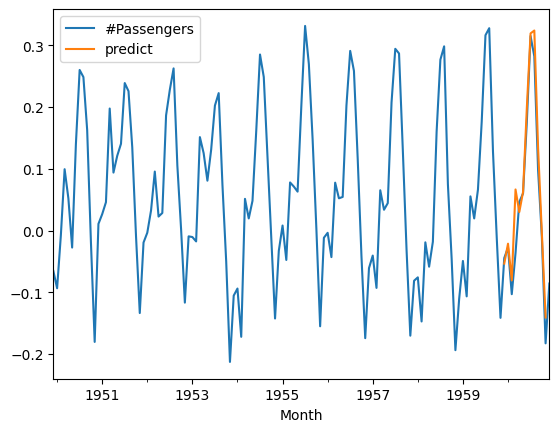

In [58]:
new_data['predict']=model1.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

FORECASTING

<Axes: xlabel='Month'>

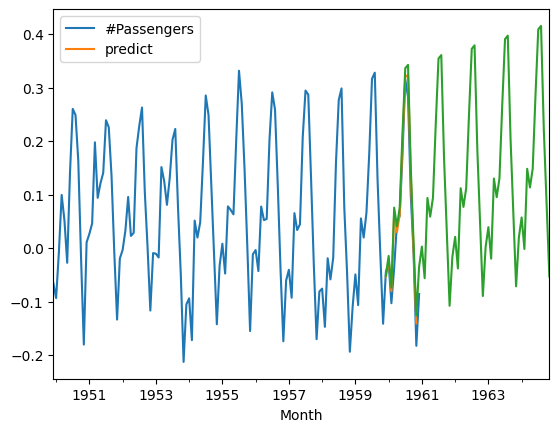

In [59]:
forecast = model.forecast(steps=60)    #for predicting future
new_data.plot()
forecast.plot()

In [60]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,RMSE
"(0, 0, 0)",0.146302
"(0, 0, 1)",0.144681
"(0, 0, 2)",0.143463
"(0, 0, 3)",0.139312
"(0, 0, 4)",0.142847
...,...
"(7, 1, 3)",0.096213
"(7, 1, 4)",0.129938
"(7, 1, 5)",0.099939
"(7, 1, 6)",0.112544


In [61]:
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

,RMSE
"(5, 1, 7)",0.084174
"(6, 0, 0)",0.087669
"(6, 1, 1)",0.087859
"(4, 0, 6)",0.088317
"(7, 1, 2)",0.089486
...,...
"(2, 1, 0)",0.225544
"(0, 1, 0)",0.236146
"(1, 1, 1)",0.247916
"(0, 1, 1)",0.260413


In [62]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(5,1,7))
model_fit = model.fit()


new_data["predict"] = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

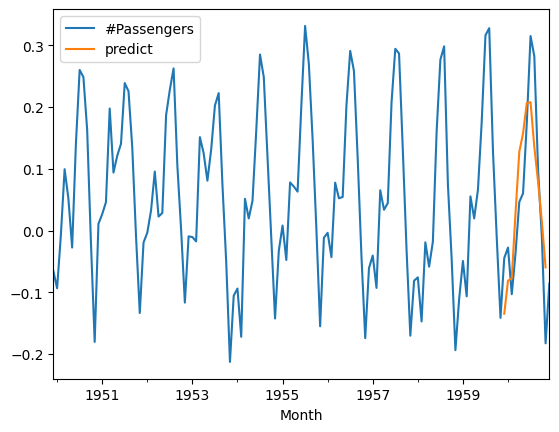

In [63]:
new_data[['#Passengers','predict']].plot()

In [64]:
model=SARIMAX(train,order=(5,1,7),seasonal_order=(5,1,7,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

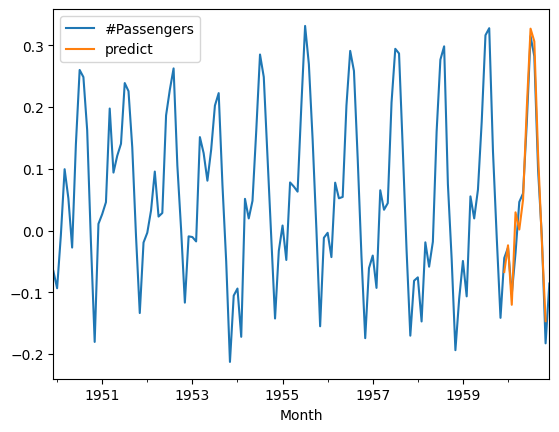

In [65]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

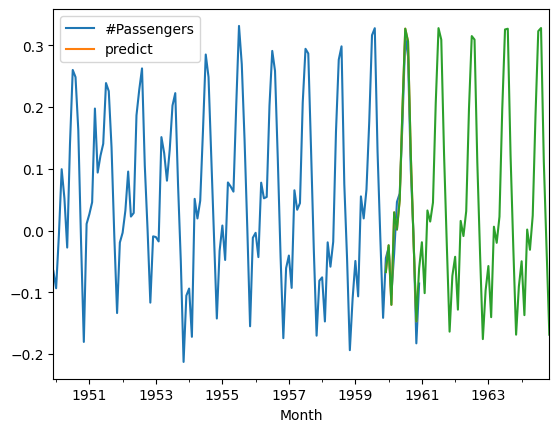

In [66]:
# forecasting for next 5 years
forecast = model.forecast(steps = 60)
new_data.plot()
forecast.plot()